In [2]:
include("../InfectionSim.jl")
include("../ODEFIT.jl")

initSIR (generic function with 1 method)

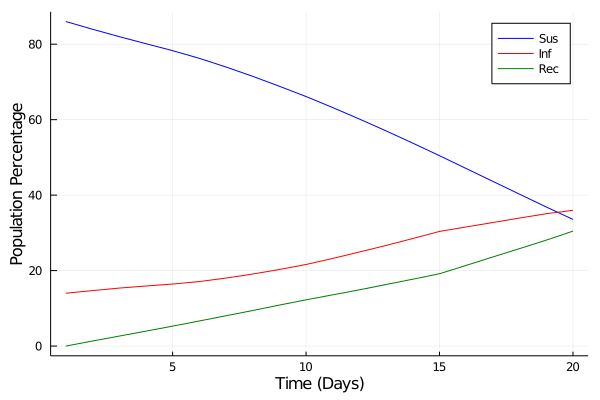

In [3]:
param = initParams(
    infections_path="../data/Sample50.csv",
    viral_loads_path="../data/raw_viral_load.csv",
    symptomatic_isolation_prob = 0.95,
    asymptomatic_prob = 0.65
)
state = initState(fill(1_000,14),param, N=100_000)
action = Action(0.0)
simHist = Simulate(20, state, param, action)
plotHist(simHist)

In [4]:
res, p = FitModel(:SIR, simHist, zeros(2), fill(10.,2))

( * Status: success

 * Candidate solution
    Final objective value:     2.369355e-02

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 4.69e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.59e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 8.31e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   9  (vs limit Inf)
    Iterations:    4
    f(x) calls:    51
    ∇f(x) calls:   51
, [0.06203104817018145, 0.1700775085541412])

In [5]:
sol = SolveODE(:SIR, initSIR(simHist), simHist.T, p)

retcode: Success
Interpolation: automatic order switching interpolation
t: 8-element Array{Float64,1}:
  1.0
  1.0724369808239378
  1.7968067890633157
  3.820524947515282
  7.0984301816757505
 11.435608452609117
 16.68245934325953
 20.0
u: 8-element Array{Array{Float64,1},1}:
 [0.86, 0.14, 0.0]
 [0.8585134400732438, 0.1408555708708567, 0.0006309890558994922]
 [0.8432942733371626, 0.1495511846008723, 0.0071545420619651846]
 [0.797521560622476, 0.17496980507478613, 0.027508634302737832]
 [0.714839037900882, 0.2177329430204637, 0.06742801907865434]
 [0.59679096964835, 0.2699521627126101, 0.13325686763903996]
 [0.4593061362290659, 0.3119346553708801, 0.228759208400054]
 [0.38385647094027014, 0.32193555383650496, 0.2942079752232249]

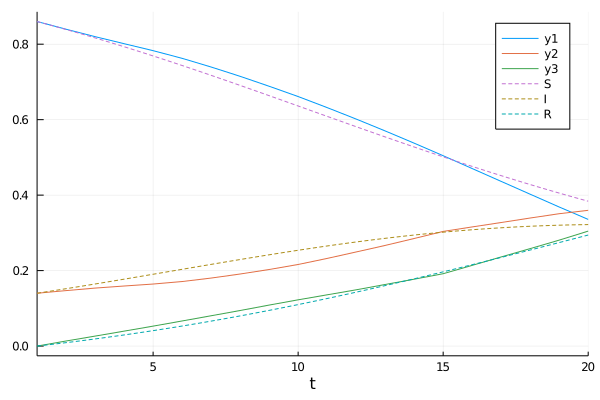

In [6]:
plot(Array(simHist)'./simHist.N)
plot!(sol, ls=:dash)

In [7]:
lower = zeros(3)
upper = fill(10.,3)
res, p = FitModel(:SEIR, simHist, lower, upper)

( * Status: success

 * Candidate solution
    Final objective value:     2.266949e-02

 * Found with
    Algorithm:     Fminbox with BFGS

 * Convergence measures
    |x - x'|               = 2.27e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.98e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 9.25e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   5  (vs limit Inf)
    Iterations:    4
    f(x) calls:    247
    ∇f(x) calls:   247
, [0.06832443949910047, 0.1875183706662753, 1.1304358907910852])

In [8]:
sol = SolveODE(:SEIR, initSEIR(simHist), simHist.T, p)

retcode: Success
Interpolation: automatic order switching interpolation
t: 20-element Array{Float64,1}:
  1.0
  1.0574380290199423
  1.200750151731064
  1.4126806372433172
  1.6825768364966889
  2.031238487922964
  2.458395478528619
  2.9798330770135
  3.604883217788471
  4.354834913251742
  5.254179072380174
  6.339159321658356
  7.642107428270489
  9.155408454381273
 10.820852490394246
 12.606145408547572
 14.490561350148814
 16.468323921247965
 18.535040600869408
 20.0
u: 20-element Array{Array{Float64,1},1}:
 [0.86, 0.0, 0.14, 0.0]
 [0.8587065966805973, 0.0012522724384439402, 0.1394927345230748, 0.0005483963578838749]
 [0.855505143107375, 0.004020146517952943, 0.13856535357955083, 0.0019093567951211376]
 [0.8508198926781796, 0.007329155692794629, 0.1379406533405442, 0.003910298288481489]
 [0.8448999153403611, 0.010503372398768016, 0.13814233863368675, 0.006454373627184012]
 [0.8372689111863822, 0.013388996158622437, 0.13958191319420574, 0.009760179460789548]
 [0.8278677100297732, 0

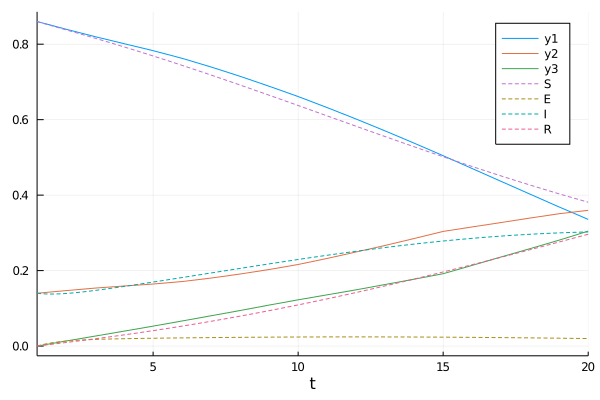

In [9]:
plot(Array(simHist)'./simHist.N)
plot!(sol, ls=:dash)

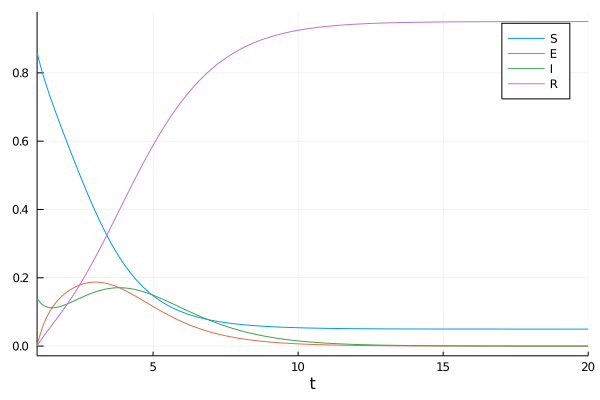

In [49]:
res = SolveODE(:SEIR, initSEIR(simHist), 20, [1.,3.,1.])
plot(res)